
# EE 461P: Data Science Principles
# Assignment 2
## Total points: 100
## Due: Tuesday, February 25th, submitted via Canvas by 11:59 pm

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Please ensure that the notebook you have uploaded on Canvas is the correct one, you could download the notebook from Canvas to double check that you have submitted the correct version on your notebook.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

### Name(s)
1. Adit Jain (aj27923)
2. Blake Adams (baa2326)

# 1. Bias-variance (20pts)

In [19]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

data_train = np.genfromtxt('data_q0_train.csv', delimiter=',')
x_train = data_train[:,0].reshape(-1, 1)
y_train = data_train[:,1].reshape(-1, 1)

data_test = np.genfromtxt('data_q0_test.csv', delimiter=',')
x_test = data_test[:,0].reshape(-1, 1)
y_test = data_test[:,1].reshape(-1, 1)

We want to build a model that can predict y for unknown inputs x.

(a) (5 pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

(b) (10 pts) Fit polynomial models of degrees 2, 3 and 4 to the training data, and report mean squared error (on both train and test sets) for all the models. Plot the data, the fitted models, and the predicted outputs.

(c) (5 pts) Which model performed the best? Explain using the bias-variance tradeoff.

Mean Squared Error on test data: 6455.708453830031


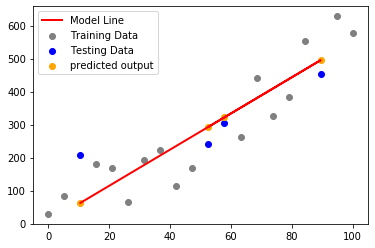

In [20]:
# part a
model = LinearRegression()  
model.fit(x_train, y_train) #training the algorithm
y_pred = model.predict(x_test)
print('Mean Squared Error on test data:', metrics.mean_squared_error(y_test, y_pred))
plt.scatter(x_train, y_train,  color='gray', label='Training Data')
plt.scatter(x_test, y_test, color='blue', label='Testing Data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Model Line')
plt.scatter(x_test, y_pred, color='orange', label='predicted output')
plt.legend()
plt.show()

In [21]:
# part b
from sklearn.preprocessing import PolynomialFeatures
p2 = PolynomialFeatures(degree=2)
x2_poly_train = p2.fit_transform(x_train)
x2_poly_test = p2.fit_transform(x_test)
model2 = LinearRegression()
model2.fit(x2_poly_train, y_train)
y2_poly_pred_train = model2.predict(x2_poly_train)
y2_poly_pred_test = model2.predict(x2_poly_test)
print("Model 1: degree = 2")
print('Mean Squared Error on training data:', metrics.mean_squared_error(y_train, y2_poly_pred_train))
print('Mean Squared Error on test data:', metrics.mean_squared_error(y_test, y2_poly_pred_test))
print("\n")

p3 = PolynomialFeatures(degree=3)
x3_poly_train = p3.fit_transform(x_train)
x3_poly_test = p3.fit_transform(x_test)
model3 = LinearRegression()
model3.fit(x3_poly_train, y_train)
y3_poly_pred_train = model3.predict(x3_poly_train)
y3_poly_pred_test = model3.predict(x3_poly_test)
print("Model 2: degree = 3")
print('Mean Squared Error on training data:', metrics.mean_squared_error(y_train, y3_poly_pred_train))
print('Mean Squared Error on test data:', metrics.mean_squared_error(y_test, y3_poly_pred_test))
print("\n")

p4 = PolynomialFeatures(degree=4)
x4_poly_train = p4.fit_transform(x_train)
x4_poly_test = p4.fit_transform(x_test)
model4 = LinearRegression()
model4.fit(x4_poly_train, y_train)
y4_poly_pred_train = model4.predict(x4_poly_train)
y4_poly_pred_test = model4.predict(x4_poly_test)
print("Model 3: degree = 4")
print('Mean Squared Error on training data:', metrics.mean_squared_error(y_train, y4_poly_pred_train))
print('Mean Squared Error on test data:', metrics.mean_squared_error(y_test, y4_poly_pred_test))
print("\n")

Model 1: degree = 2
Mean Squared Error on training data: 3638.12177725299
Mean Squared Error on test data: 4683.309906329018


Model 2: degree = 3
Mean Squared Error on training data: 3569.900366307118
Mean Squared Error on test data: 4602.202716053174


Model 3: degree = 4
Mean Squared Error on training data: 2677.0520780797765
Mean Squared Error on test data: 5713.880610619233




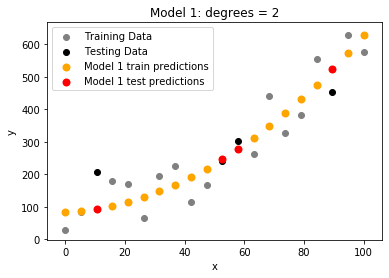

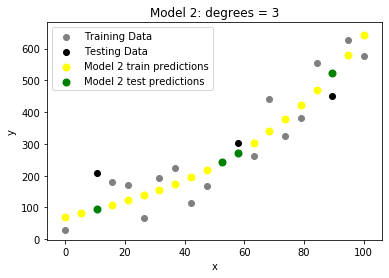

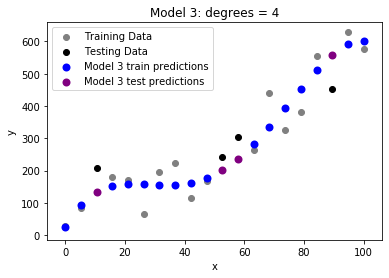

In [22]:
# part b (continued)

plt.scatter(x_train, y_train,  color='gray', label='Training Data')
plt.scatter(x_test, y_test, color='black', label='Testing Data')
plt.scatter(x_train, y2_poly_pred_train, color='orange', linewidth=2, label='Model 1 train predictions')
plt.scatter(x_test, y2_poly_pred_test, color='red', linewidth=2, label='Model 1 test predictions')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Model 1: degrees = 2")
plt.show()

plt.scatter(x_train, y_train,  color='gray', label='Training Data')
plt.scatter(x_test, y_test, color='black', label='Testing Data')
plt.scatter(x_train, y3_poly_pred_train, color='yellow', linewidth=2, label='Model 2 train predictions')
plt.scatter(x_test, y3_poly_pred_test, color='green', linewidth=2, label='Model 2 test predictions')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Model 2: degrees = 3")
plt.show()

plt.scatter(x_train, y_train,  color='gray', label='Training Data')
plt.scatter(x_test, y_test, color='black', label='Testing Data')
plt.scatter(x_train, y4_poly_pred_train, color='blue', linewidth=2, label='Model 3 train predictions')
plt.scatter(x_test, y4_poly_pred_test, color='purple', linewidth=2, label='Model 3 test predictions')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Model 3: degrees = 4")
plt.show()




# part c

Model 2 is the best with degrees = 3. Generally, increasing in degree of polynomial for fitting the data causes bias to go down and variance to go up. Though model 3 has the lowest MSE on the training data, it could be overfitting the data and thus cause high variance but low bias; this is an example where the model is consistently wrong, but never by much. Model 1 on the other hand is too simple and thus has a high bias but low variance; this is an example of where the model is correct on average but is more variable in its predictions. Model 2 is the best here since it has the lowest MSE on the test set and is the best balance in the bias-variance tradeoff, even though it doesn't have the lowest MSE on the training set.

# 2. (10 pts)

Consider the following loss function of the scalar w.
\begin{align*}
\begin{split}
L(w) = \frac{1}{2}w^{2}\\
\end{split}
\end{align*}

We would like to minimize this function using gradient descent. So we start with initial value w(0) = 1 and update the weight at time step t as 
\begin{align*}
\begin{split}
w(t+1) = w(t) - \epsilon \frac{\partial L}{\partial w} \vert_t\\
\end{split}
\end{align*}

Compute the weights after the first three steps, i.e., compute w(1), w(2) and w(3) for each of the following choices of epsilon.
\begin{equation*} 
\epsilon = 0.5\\
\epsilon = 1\\
\epsilon = 2\\
\end{equation*}
Based on your observations, comment on how you expect the model to converge (if at all) for the different epsilon choices.

# Answer 2

<br><br><br><br><br>


<img src="Question 2.jpg" style= "transform: rotate(90deg)">

If Image doesn't load, refere to attached Question 2


# Question 3 : Compute the weights (20 pts)

For the given network, I, W and O represent the inputs, weights and output respectively and let l be the learning rate.

Activation: Logistic

Loss: Squared Loss

Q: Derive the equations to update the values of w5 and w6 after one iteration of backpropagation.

![](https://drive.google.com/uc?id=10hNij5ir0fA1demVRRg1Lbq36j0YFGlD)

# Answer 3

<br><br><br><br><br>


<img src="Question 3 updated.jpg" style= "transform: rotate(90deg)">


If Image doesn't load, refere to attached Question 3 Updated


# 4.  Tensor Playground (25pts)
Visit https://playground.tensorflow.org for this problem

From the far right, select "Classification" as the problem type, and select the data set on the top left (blue ball within an orange circle). 

1) Use the following default settings - test/training ratio 50%, Noise 0, Batch Size 30, learning rate 0.01, one hidden layer with 4 neurons, input as $X_1$, $X_2$ and no Regularization. Run two experiments - one using Tanh as the activation function and one using the linear activation function. Report the train, test losses for both these experiments at the end of 1000 epochs(2 pairs). What qualitative difference do you observe in the decision boundaries obtained? Why? **(4 pts)**

We will now study the effect of certain variations in the network structure or training, keeping all other aspects the same as in the default configuration specified above, and with tanh as the activation for hidden units.

2) **Effect of number of hidden units**:  Report the train, test losses at the end of 1000 epochs for 2, 4, and 8 neurons in the hidden layer (3 pairs of results). What do you observe regarding the decision boundary as the number of neurons increases? Why? **(4 pts)**

3) **Effect of learning rate and number of epochs:** Use the above setting, set the activation to be Tanh and have four neurons in the hidden layer. Report the train, test losses at the end of 100 epochs and 1000 epochs for learning rates of 10, 0.1, 0.01 and 0.001 (8 pairs of results). What do you observe in the loss curves? Explain. **(4 pts)**

4) **Effect of number of neurons:** Use the above setting, set the activation to be Tanh and learning rate to be 0.01. Change the number of neurons in the additional hidden layer - first with 8 neurons and then with 4 neurons. Report the train, test values at the end of 2000 epochs (2 pairs) and attach the screenshot from Tensor playground. Explain the changes you see with this additional hidden layer. **(5 pts)**.

5) Fix the test/training ratio 50% and Noise to 0 (same as before). Play around with any of the other hyperparameters, network architectures and input features (such as $\sin(X_1), X_1^2$ etc.) and report the best train/test loss you could get (test loss should be at most 0.06). Attach the screenshot from  Tensor playground for the same (show your full network, output and parameters). Briefly justify your decisions, and comment on difficulties/tradeoffs, what helps/what doesn't,etc.  **(8 pts)**
 

# Answer 4
Format of pairs is (Training Loss, Test Loss)<br><br>

1)<br>
For Tanh activation:<br>
(.039, .041)<br>

For linear activation:<br>
(.498, .501)<br>

The decision boundaries for the tanh function represented the data much better, with much more confidence (colors were darker shades representing that they were closer to -1 or 1). The linear boundaries did not split the data well and was much less confident, because it could only split the data by a single line, which is a poor choice for this type of data.<br><br>

2)<br>
For 2 Neurons:<br>
(.221, .287)<br>

For 4 Neurons:<br>
(.034, .033)<br>

For 8 Neurons:<br>
(.022, .026)<br>

As the number of neurons increase, the decision boundaries become more precise and accurate. 2 Neurons gives boundaries that have linear separation, while 4 neurons gives more circular boundaries that better fit the data. 8 Neurons does an even better job, narrowing the boundaries around the points even more.<br><br>

3)<br>
For Training Rate of 10:<br>
After 100 epochs:<br>
(.402, .326)<br>
After 1000: <br>
(.320, .234)<br><br>

For Training Rate of .1:<br>
After 100 epochs:<br>
(.040, .038) <br>
After 1000:<br>
(.005, .006)<br><br>

For Training Rate of .01:<br>
After 100 epochs:<br>
(.456, .463)<br>
After 1000:<br>
(.033, .031)<br>

For Training Rate of .001:<br>
After 100 epochs<br>
(.495, .493)<br>
After 1000:<br>
(.341, .350)<br><br>

Generally, the higher the learning rate, the more steeply the loss curve will decrease. .001 had a very gradual decline while .01 and .1 were much more steep at the beginning before eventually flattening out. A learning rate of 10 had an initial steep decline, a plateau, and then another decline after about 500 epochs. The 10 learning rate was much more variable when rerun in the plot of its loss function over time and saw drastic spikes and drop offs. <br><br>

4)<br>
For 8 neurons in the additional layer:<br>
(.002, .002)<br>

<img src="Additional Layer 8 Neurons 2.png"><br>

If Image doesn't load, refer to Additional Layer 8 Neurons 2<br>

For 4 neurons in the additional layer:<br>
(.002, .006)<br>
<img src="Additional Layer 4 Neurons.png"><br><br>

If Image doesn't load, refer to Additional Layer 4 Neurons<br>

The addition of a hidden layer made the decision boundaries even tighter than before. These nets produced boundaries that very accurately surrounded the data and produced both training and test losses that were lower than just using 1 hidden layer. As expected, increasing the number of neurons in the hidden layer produced better results, but the difference was pretty slight.<br><br>

5)
After trying many things, our best results was (.000, .000)<br>

<img src="Best Training Model 5.png"><br>

If Image doesn't load, refer to Best Training Model 5<br>

We were able to create a model that brought the training and test loss to 0 at around 900 epochs. We used a model that had input features of X1^2, x2^2, sin(X1), sin(X2) to more accurately represent the circular bounds of the data. We used 3 hidden layers with 4 neurons each, since the addition of hidden layers increased the speed of the loss decline. We were able to achieve losses of 0 faster with more layers, but there was a computational tradeoff and we decided that 3 was good enough for the task. The types of input features were probably the most useful, as they strongly expanded the ways the decision boundaries could form and create a more powerful model. The number of hidden layers and number of neurons both helped in taking the losses from a very low number all the way to 0.

# 5. Stochastic Gradient Descent (25 pts)
1) Write Python code for an SGD solution to the non-linear model without using any library except those that are present in the code template. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2^2 + w_4x_2^3$$ 

Try to format similarly to scikit-learn's models. The template of the class is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X, y` and a choice of `update_rule` as `'sgd'` or `'sgd_momentum'` or `'Adagrad'`. The `predict()` method takes an `X` value (optionally, an array of values). Use your new gradient descent regression to predict the data given in 'q5_samples.csv', for 15 epochs, using learning rates: `[0, .0001, .001, .01, 0.1, 1, 10, 100]` and regularization (ridge regression) constants: `[0, 10, 100]`. **(8 points)**

Plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD, SGD-Momentum and Adagrad. I.e., you should have one plot of MSE and another for the parameter updates for SGD, SGD-Momentum and Adagrad (6 plots total). Report the `learning_rate`, `regularization_constant` and MSE at the end of 15 epochs for the two best combinations in each of SGD, SGD-Momentum and Adagrad. **($6\times 2 = 12$ pts)**

Here are two blogs which you can go through to know about Adagrad - [blog 1](https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827) and [blog 2](http://ruder.io/optimizing-gradient-descent/).


2) Based on the experiments, which of the 3 techniques allowed for a larger initial setting of the learning_rate? Why? **(5pts)**

In [15]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.coef = np.random.rand(5,1) # w0,w1,w2,w3,w4
        #self.coef = np.zeros(5) #one coef for each of the terms
        self.eps = 10**-6 #used only for adagrad
        self.cache = np.zeros(self.coef.shape) #used only for adagrad
        self.mu = 0.9 #used in momentum


        
    def sgd(self, gradient):
        '''
        updates self.coef based on gradient using SGD
        '''
        self.coef += -(self.learning_rate *gradient)
        
    def adagrad(self, gradient):
        '''
        updates self.coef based on gradient using Adagrad
        '''
        self.coef += -(self.learning_rate*gradient)/np.sqrt(np.diagonal(self.cache)+self.eps)
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
        self.coef += gradient
        
    def fit(self, X, y, update_rule='sgd', plot=False):
        
        '''
        Fits the model for the given X, y. It uses the update rule mentioned by the parameter update_rule
        and displays a plot of the coefficients vs epochs and mse vs epochs if plot is True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the respective update rule and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''
        feats = self.get_features(X)
        y2 = X.loc[:,'y']
        epochs = []
        coeffs = []
        v_prev = np.zeros([feats.shape[1],1]) # Previous timestep velocity (SGD momentum)
        for epoch in range(1,self.n_epoch):
            for x,y_hat in zip(feats.itertuples(), y2):
                x = np.expand_dims(np.array(x[1:]),0) # make [1xP] instead of [P]
                prediction = self.linearPredict(x)
                print(y_hat)
                diff = y_hat - prediction # actual - predicted
                regular_term = self.regularization * np.sum(np.square(self.coef))
                error = diff**2 + regular_term
                gradient = -(2*feats*diff).T + 2*self.coef
                    
                if update_rule == 'sgd':
                    self.sgd(gradient)
                elif update_rule == 'adagrad':
                    self.cache += np.power(gradient, 2)
                    self.adagrad(gradient)
                elif update_rule == 'sgd_momentum':
                    v = mu*v_prev - (self.learning_rate)*(gradient)
                    self.sgd_momentum(v)
                    v_prev = v
                coeffs.append(self.coef)
                epochs.append(epoch)
                
    def get_features(self, X):
        '''
        X (input) is the nx2 dimensional array - n data points with X_1 and X_2.
        It returns a nX5 dimensional array - n data points with 1, X_1, X_1X_2, X_1^2X_2^2, X_2^3.
        '''
        feats = pd.DataFrame()
        feats['x1'] = X.iloc[:,0]
        feats['ones'] = 1
        feats['x1x2'] = np.multiply(X.iloc[:,0],X.iloc[:,1])
        feats['x1^2x2^2'] = np.multiply(np.power(X.iloc[:,0], 2),np.power(X.iloc[:,1], 2))
        feats['x2^3'] = np.power(X.iloc[:,1], 2)
        col_order = ['ones','x1','x1x2','x1^2x2^2','x2^3']
        return feats[col_order]
        
    def linearPredict(self, X_features):
        '''
        returns the dot product of X and self.coef
        '''
        dot_prod = np.matmul(X_features,self.coef)
        print("dot product: " + str(dot_prod))
        return dot_prod

In [17]:
# Answer 5
df = pd.read_csv("q5_samples.csv",delimiter=',')
#X = df.iloc[:,0:2] # x1 and x2 together
X = df[['x1', 'x2']]
model = LinearRegression(regularization=0, n_epoch=15, learning_rate=0.01)
y_train = df[['y']]
model.fit(df, y_train)

dot product: [[0.76052291]]
0.25673540979446197


ValueError: Unable to coerce to DataFrame, shape must be (500, 5): given (1, 1)

# Answer 5